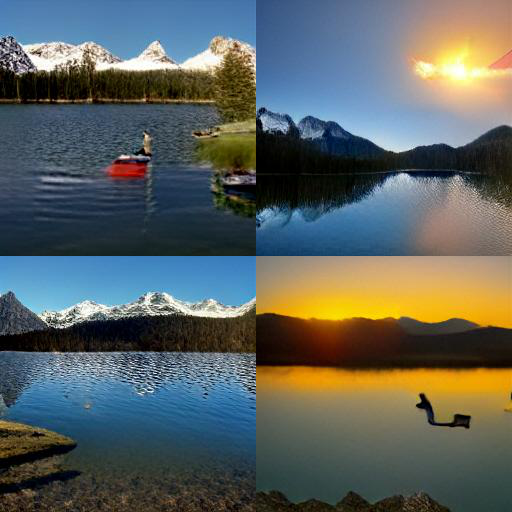

In [36]:
from azureml.core import Workspace
import requests, json, base64, io
from PIL import Image
import numpy as np

dimension = 2

workspace = Workspace.from_config()
service = workspace.webservices['dall-e-endpoint']


sample_input = json.dumps({
    'text': 'sun raise at a lake with mountains',
    'num_images':dimension * dimension
})
response = service.run(sample_input)
returnedMsg = json.loads(response)['generatedImgs']

final_image = np.zeros((256*dimension, 256*dimension,3 ))
for idx,img in enumerate(returnedMsg):
    image = Image.open(io.BytesIO(base64.b64decode(img)))
    row_id = idx // dimension
    col_id = idx % dimension
    final_image[256*row_id:256*(row_id+1), 256*col_id:256*(col_id+1)]=np.array(image)
Image.fromarray(np.uint8(final_image))